In [ ]:
!pip install gym matplotlib torch


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 67.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 67.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 33.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 13.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 96.2 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitlin

In [ ]:
!pip install gymnasium

import gymnasium as gym
import torch
import torch.nn as nn
import torch.optim as optim
import random

class DQN(nn.Module):
    def __init__(self, state_size, action_size):
        super(DQN, self).__init__()
        self.fc1 = nn.Linear(state_size, 64)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(64, action_size)

    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.fc2(x)
        return x

class DQNAgent:
    def __init__(self, state_size, action_size):
        self.state_size = state_size
        self.action_size = action_size
        self.model = DQN(state_size, action_size)
        self.optimizer = optim.Adam(self.model.parameters(), lr=0.001)
        self.criterion = nn.MSELoss()
        self.memory = []
        self.gamma = 0.95
        self.epsilon = 1.0
        self.epsilon_decay = 0.995
        self.epsilon_min = 0.01
        self.batch_size = 32

    def remember(self, state, action, reward, next_state, done):
        self.memory.append((state, action, reward, next_state, done))

    def act(self, state):
        if random.uniform(0, 1) < self.epsilon:
            return random.randrange(self.action_size)
        else:
            state = torch.FloatTensor(state)
            q_values = self.model(state)
            return torch.argmax(q_values).item()

    def replay(self):
        if len(self.memory) < self.batch_size:
            return

        minibatch = random.sample(self.memory, self.batch_size)
        states, actions, rewards, next_states, dones = zip(*minibatch)

        states = torch.FloatTensor(list(states))
        actions = torch.LongTensor(list(actions))
        rewards = torch.FloatTensor(list(rewards))
        next_states = torch.FloatTensor(list(next_states))
        dones = torch.FloatTensor(list(dones))

        current_q_values = self.model(states).gather(1, actions.unsqueeze(1)).squeeze(1)
        next_q_values = self.model(next_states).max(1)[0].detach()
        target_q_values = rewards + (self.gamma * next_q_values * (1 - dones))

        loss = self.criterion(current_q_values, target_q_values)
        self.optimizer.zero_grad()
        loss.backward()
        self.optimizer.step()

        if self.epsilon > self.epsilon_min:
            self.epsilon *= self.epsilon_decay

In [ ]:
env = gym.make("CartPole-v1")
state_size = env.observation_space.shape[0]
action_size = env.action_space.n
agent = DQNAgent(state_size, action_size)

episodes = 1000

for episode in range(episodes):
    state = env.reset()
    if isinstance(state, tuple):
        state = state[0]
    total_reward = 0
    done = False

    while not done:
        action = agent.act(state)
        next_state, reward, done, truncated, info = env.step(action)
        agent.remember(state, action, reward, next_state, done)
        state = next_state
        total_reward += reward
        agent.replay()

    print(f"Episode: {episode+1}, Total Reward: {total_reward}, Epsilon: {agent.epsilon:.2f}")

env.close()

Episode: 1, Total Reward: 9.0, Epsilon: 1.00
Episode: 2, Total Reward: 18.0, Epsilon: 1.00
Episode: 3, Total Reward: 15.0, Epsilon: 0.95
Episode: 4, Total Reward: 18.0, Epsilon: 0.86
Episode: 5, Total Reward: 25.0, Epsilon: 0.76
Episode: 6, Total Reward: 12.0, Epsilon: 0.72
Episode: 7, Total Reward: 21.0, Epsilon: 0.65
Episode: 8, Total Reward: 35.0, Epsilon: 0.54
Episode: 9, Total Reward: 10.0, Epsilon: 0.52
Episode: 10, Total Reward: 13.0, Epsilon: 0.48
Episode: 11, Total Reward: 20.0, Epsilon: 0.44
Episode: 12, Total Reward: 12.0, Epsilon: 0.41
Episode: 13, Total Reward: 8.0, Epsilon: 0.40
Episode: 14, Total Reward: 12.0, Epsilon: 0.37
Episode: 15, Total Reward: 9.0, Epsilon: 0.36
Episode: 16, Total Reward: 11.0, Epsilon: 0.34
Episode: 17, Total Reward: 12.0, Epsilon: 0.32
Episode: 18, Total Reward: 11.0, Epsilon: 0.30
Episode: 19, Total Reward: 12.0, Epsilon: 0.28
Episode: 20, Total Reward: 8.0, Epsilon: 0.27
Episode: 21, Total Reward: 10.0, Epsilon: 0.26
Episode: 22, Total Reward:

Episode: 1, Total Reward: 16.0, Epsilon: 1.00
Episode: 2, Total Reward: 24.0, Epsilon: 0.96
Episode: 3, Total Reward: 44.0, Epsilon: 0.77
Episode: 4, Total Reward: 18.0, Epsilon: 0.70
Episode: 5, Total Reward: 16.0, Epsilon: 0.65
Episode: 6, Total Reward: 41.0, Epsilon: 0.53
Episode: 7, Total Reward: 10.0, Epsilon: 0.50
Episode: 8, Total Reward: 10.0, Epsilon: 0.48
Episode: 9, Total Reward: 15.0, Epsilon: 0.44
Episode: 10, Total Reward: 11.0, Epsilon: 0.42
Episode: 11, Total Reward: 11.0, Epsilon: 0.40
Episode: 12, Total Reward: 12.0, Epsilon: 0.37
Episode: 13, Total Reward: 13.0, Epsilon: 0.35
Episode: 14, Total Reward: 10.0, Epsilon: 0.33
Episode: 15, Total Reward: 10.0, Epsilon: 0.32
Episode: 16, Total Reward: 15.0, Epsilon: 0.29
Episode: 17, Total Reward: 11.0, Epsilon: 0.28
Episode: 18, Total Reward: 15.0, Epsilon: 0.26
Episode: 19, Total Reward: 11.0, Epsilon: 0.24
Episode: 20, Total Reward: 9.0, Epsilon: 0.23
Episode: 21, Total Reward: 11.0, Epsilon: 0.22
Episode: 22, Total Rewa

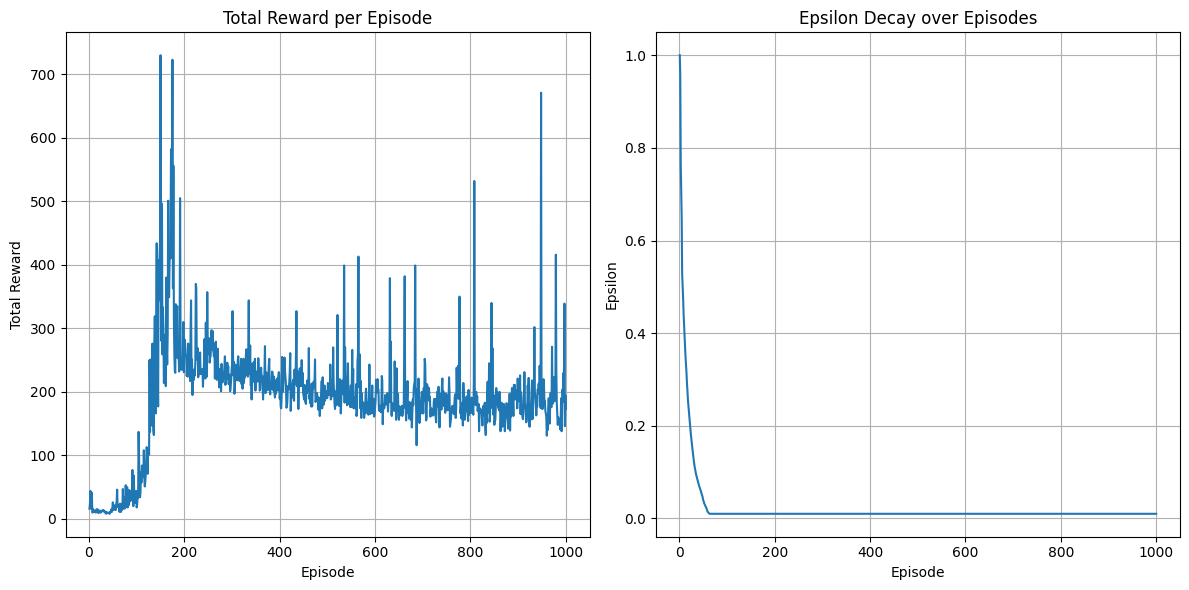

In [ ]:
import matplotlib.pyplot as plt

env = gym.make("CartPole-v1")
state_size = env.observation_space.shape[0]
action_size = env.action_space.n
agent = DQNAgent(state_size, action_size)

episodes = 1000

episode_list = []
reward_list = []
epsilon_list = []

for episode in range(episodes):
    state = env.reset()
    if isinstance(state, tuple):
        state = state[0]
    total_reward = 0
    done = False

    while not done:
        action = agent.act(state)
        next_state, reward, done, truncated, info = env.step(action)
        agent.remember(state, action, reward, next_state, done or truncated)
        state = next_state
        total_reward += reward
        agent.replay()

    episode_list.append(episode + 1)
    reward_list.append(total_reward)
    epsilon_list.append(agent.epsilon)

    print(f"Episode: {episode+1}, Total Reward: {total_reward}, Epsilon: {agent.epsilon:.2f}")

env.close()

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(episode_list, reward_list)
plt.xlabel("Episode")
plt.ylabel("Total Reward")
plt.title("Total Reward per Episode")
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(episode_list, epsilon_list)
plt.xlabel("Episode")
plt.ylabel("Epsilon")
plt.title("Epsilon Decay over Episodes")
plt.grid(True)

plt.tight_layout()
plt.show()


In [4]:
import matplotlib.pyplot as plt

plt.savefig('dqn_training_plot.png')
print("Plot saved as dqn_training_plot.png")

Plot saved as dqn_training_plot.png


<Figure size 640x480 with 0 Axes>

1.How the game works:
 The above codes implements a Deep Q-Network (DQN) agent to learn to play the CartPole-v1 game.
The agent's performance (measured by total reward per episode) generally improves over time as it learns the optimal strategy.
 The epsilon value, which controls the exploration-exploitation trade-off, decays over time, meaning the agent explores less and relies more on its learned strategy.
 The training process involves the agent interacting with the environment, remembering its experiences, and using these experiences to train its neural network model.

2.Understanding the Game:

Imagine a pole standing upright on a cart. The cart can move left or right. The goal is to keep the pole balanced on the cart for as long as possible. If the pole falls too far to either side, the game ends.

Your goal is to move the cart left or right to keep the pole upright.
The game provides information about the state of the game (like the position and speed of the cart, and the angle and speed of the pole).
You need to decide at each step whether to push the cart left or right.
You get a reward for each moment the pole stays upright. The game ends if the pole falls over or the cart goes off the screen.
The goal of the program is to train a computer agent to make these decisions automatically to maximize the time the pole stays upright.

3.Rules to follow:
 The game is CartPole-v1 from the Gymnasium library.
The agent uses a Deep Q-Network (DQN) to learn the optimal actions.
The agent observes the state of the game (position, velocity, angle, angular velocity).
The agent chooses an action: either move the cart left or move the cart right.
The agent receives a reward for each timestep the pole remains upright.
The game ends when the pole angle exceeds a certain threshold or the cart moves off the screen.
The agent learns by remembering its past experiences (state, action, reward, next state, whether the game ended).
The agent periodically uses these memories to update its internal model (the neural network) to better predict which actions will lead to higher future rewards.
The agent starts by exploring actions randomly (high epsilon) and gradually shifts towards using its learned knowledge (low epsilon).


